In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def splice_rate_lin(num_RNAPs, rate_splice):
    '''Calculates linear approximation of splice rate (bp/50% spliced)
    for mRNAs given different numbers of RNAPs and the splice rate given
    single RNAP occupancy'''
    sr = num_RNAPs*rate_splice
    return sr

def splice_rate_exp(num_RNAPs, rate_splice):
    '''Calculates exponential approximation of splice rate (bp/50% spliced)
    for mRNAs given different numbers of RNAPs and the splice rate given
    single RNAP occupancy'''
    sr = rate_splice**num_RNAPs
    return sr

def plot_the_plots(n, rs):
    '''Iterates through and labels arrays results of linear and exponential 
    models of Malat1/RNAP cooperation in splicing'''
    plt.plot(RNAPs, exps[n],'.')
    plt.plot(RNAPs, lins[n],'.')
    plt.xlabel('Number RNAPs')
    plt.ylabel('Splice Rate (kb/50% splice)')
    plt.legend(['Exponential', 'Linear'])
    plt.title(str(rs[n]) + ' kb/50% splice at 1 RNAP')
    plt.show()

In [2]:
# Practicing with a rate of splicing with one RNAP as 2.2 kb/50% splice
# and a range of 1 to 5 RNAPs on the gene

rate = 2.2 #kb/50% splice
RNAPs = range(1,6)

exp = []
lin = []
for i in RNAPs:
    exp.append(splice_rate_exp(i, rate))
    lin.append(splice_rate_lin(i, rate))
print('Exponential approximation:')
print(exp)
print('Linear approximation')
print(lin)

Exponential approximation:
[2.2, 4.840000000000001, 10.648000000000003, 23.425600000000006, 51.53632000000002]
Linear approximation
[2.2, 4.4, 6.6000000000000005, 8.8, 11.0]


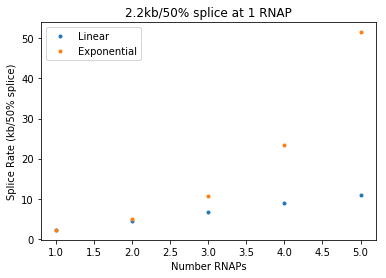

In [3]:
# Plotting manually (used this code as basis for plot_the_plots)
plt.plot(RNAPs, lin, '.')
plt.plot(RNAPs, exp, '.')
plt.xlabel('Number RNAPs')
plt.ylabel('Splice Rate (kb/50% splice)')
plt.legend(['Linear', 'Exponential'])
plt.title('2.2kb/50% splice at 1 RNAP')

In [4]:
# Try several different 1 RNAP rates with a variety of RNAPs
# Setting the 1 RNAP rates to 1-10 kb/50% splice at 0.2 kb intervals
rs = np.arange(1,10.2,0.2)
print('Rates of Splicing with 1 Malat1/RNAP Complex')
print(rs)

# Empty lists to store lists of model outputs
exps = []
lins = []

# Loop through the different 1 RNAP rates
for i in range(len(rs)):
    # Empty lists to be regenerated with each value in rs
    tempex = []
    templin = []
    # Apply linear and exponential models for each number of RNAPs
    for j in RNAPs:
        tempex.append(splice_rate_exp(j, rs[i]))
        templin.append(splice_rate_lin(j, rs[i]))
    # Append each list of values for each model to the lists
    # outside the loop
    exps.append(tempex)
    lins.append(templin)

Rates of Splicing with 1 Malat1/RNAP Complex
[ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8
  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4  6.6  6.8
  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8
 10. ]


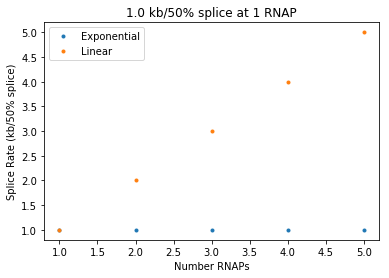

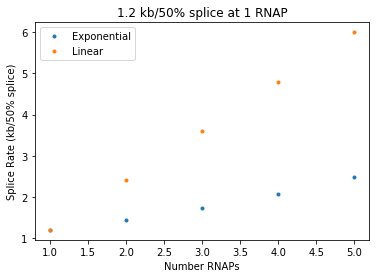

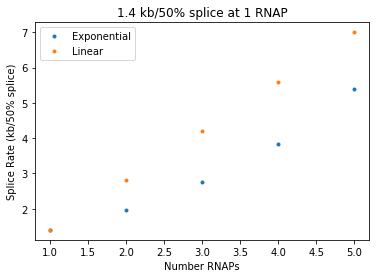

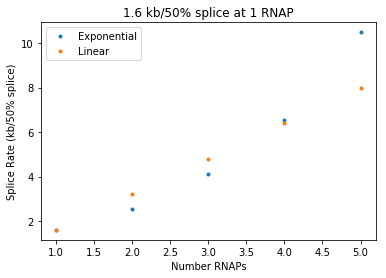

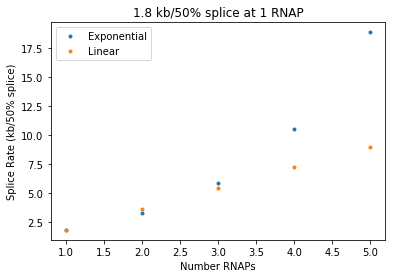

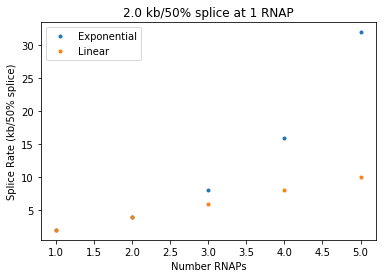

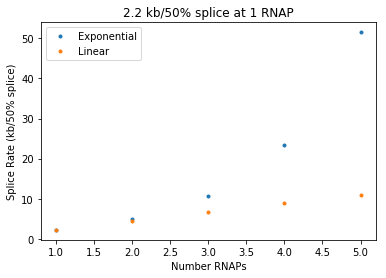

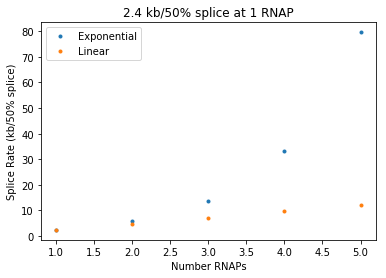

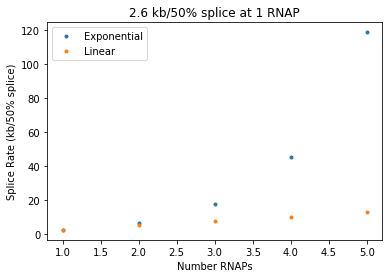

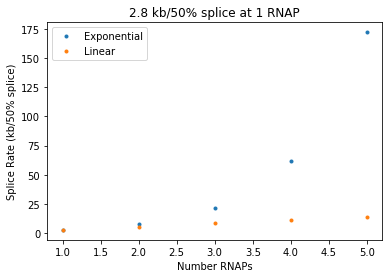

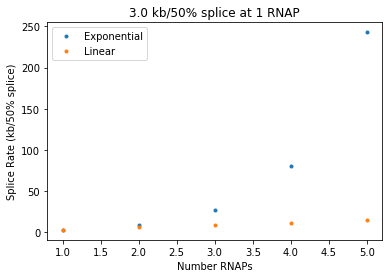

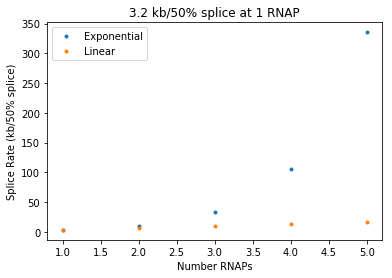

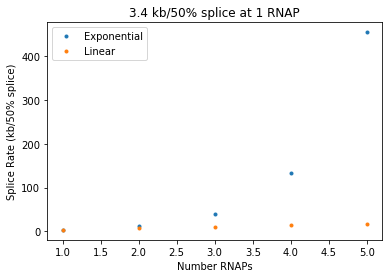

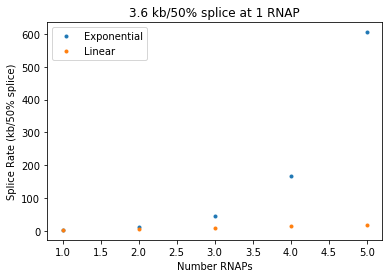

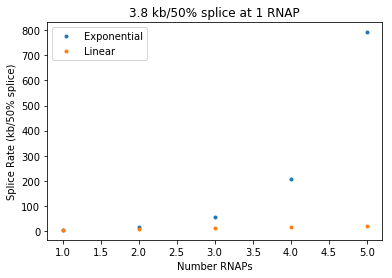

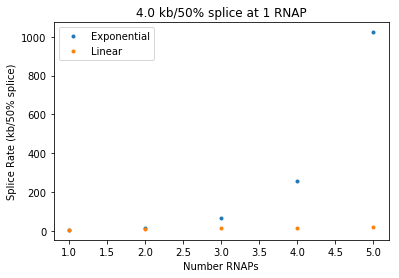

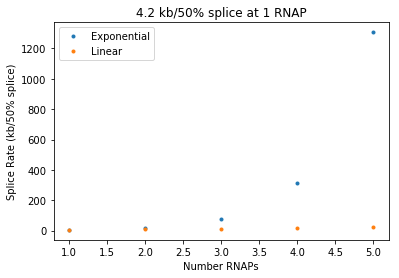

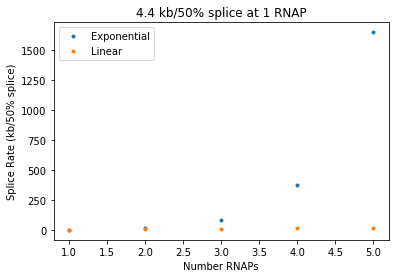

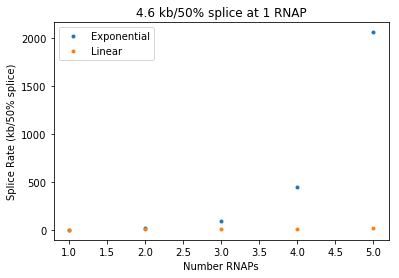

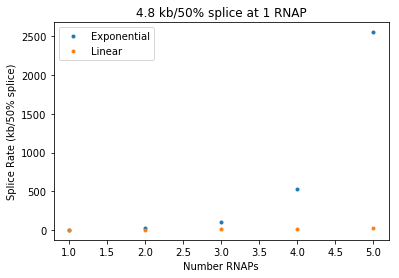

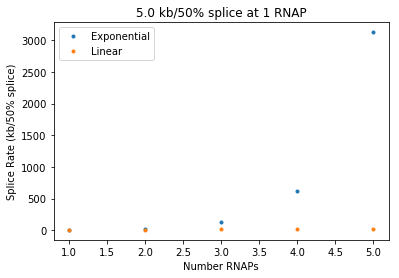

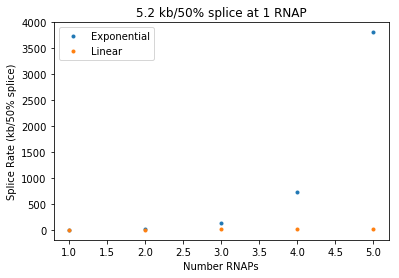

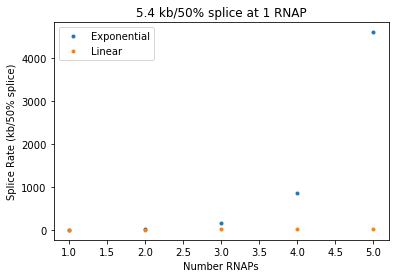

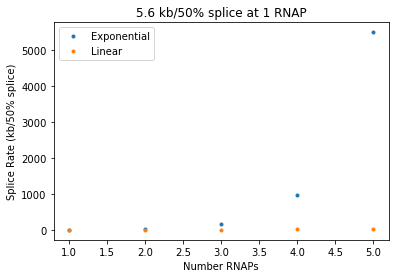

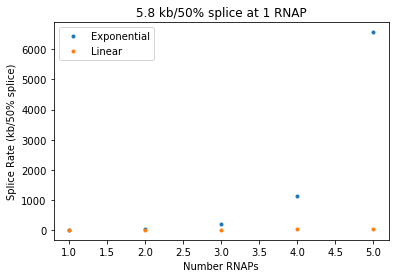

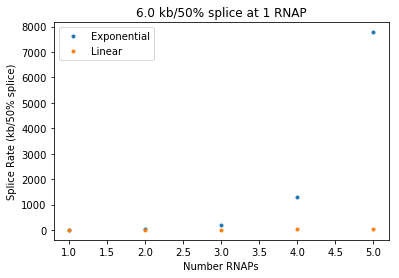

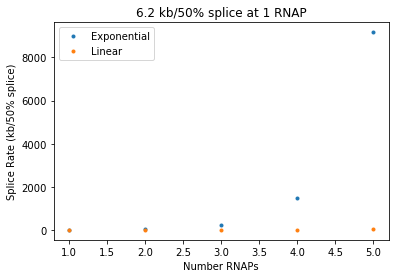

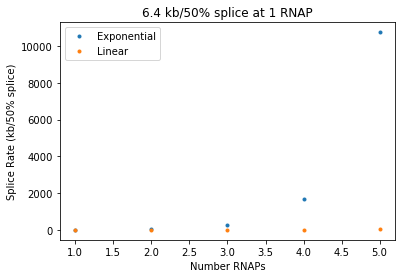

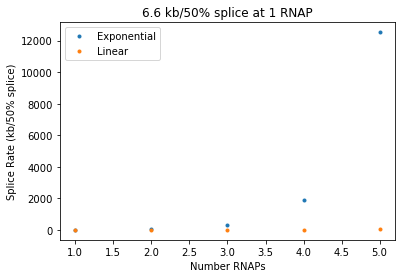

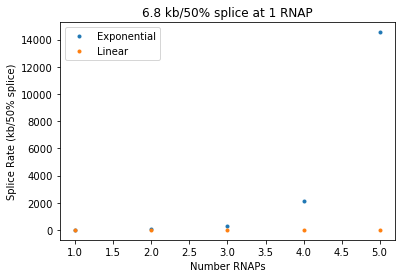

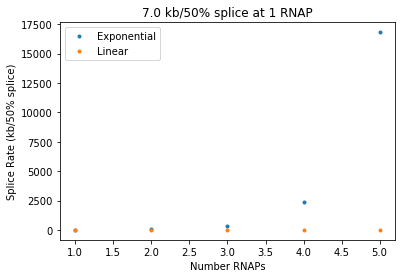

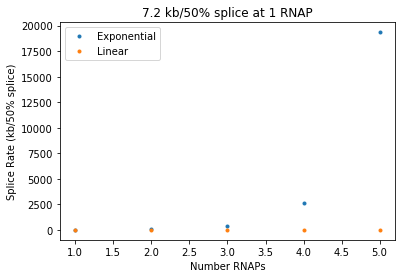

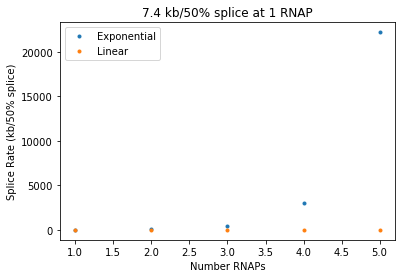

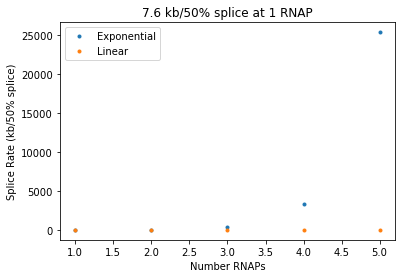

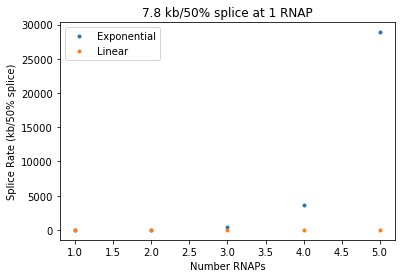

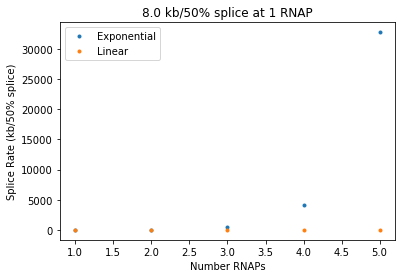

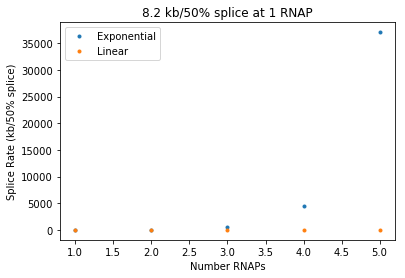

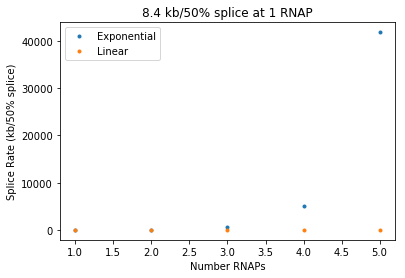

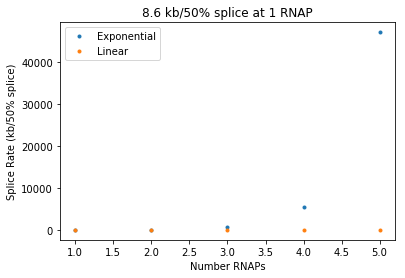

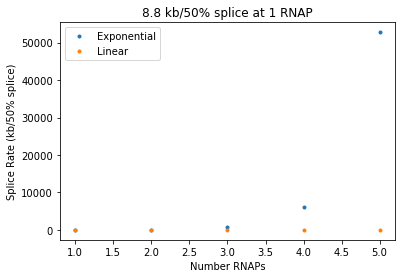

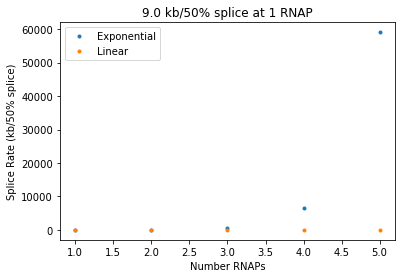

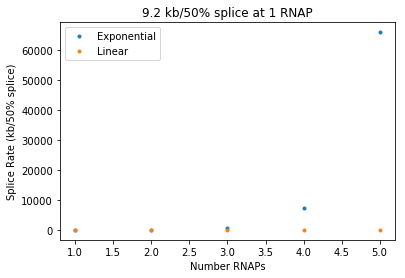

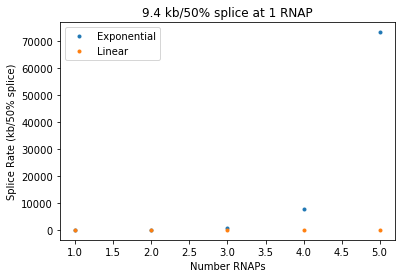

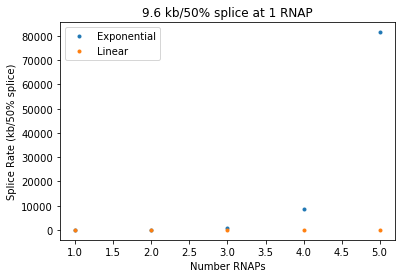

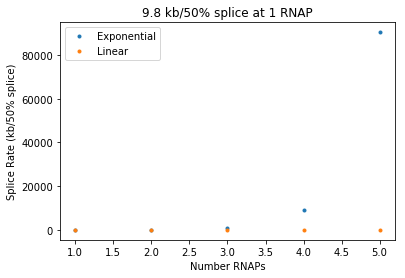

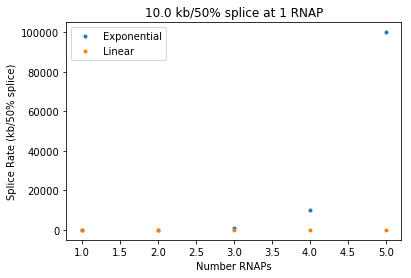

In [5]:
# Use the exponent model list as an index to loop through 
# both the linear and exponential models for different 
# 1 RNAP splicing rates and plot
for i in range(len(exps)):
    plot_the_plots(i, rs)

## For us to see a cooperative model of Malat1 splicing, I expect the splicing rate for 1 Malat1/RNAP complex to be between 2 and 5 kb/50% splicing. Lower than that would show either no difference or slowing of splicing relative to a linear model, and much higher would make the linear and exponential functions indistinguishable experimentally except 4 or greater RNAP occupancy per gene. We could potentially model this with tethering experiments or by titrating Malat1 levels in vivo.